In [1]:
import sys
sys.path.append('/home/adelsondias/Repos/sensingbee/sensingbee')
import source as sb

configuration__ = {
    'DATA_FOLDER':'/home/adelsondias/Repos/newcastle/air-quality/data_1week1/',
    'SHAPE_PATH':'/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales.shp',
    'Sensors__frequency':'D',
    'Sensors__variables': ['NO2','Temperature','PM2.5'],
    'Sensors__threshold_callibration': {'Temperature':25, 'NO2':80, 'PM2.5':15},
    'Geography__filter_column':'msoa11nm',
    'Geography__filter_label':'Newcastle upon Tyne',
    'Geography__meshgrid':{'dimensions':[50,50], 'longitude_range':[-1.8, -1.51], 'latitude_range':[54.96, 55.05]},
    'osm_bbox': '(54.96,-1.8,55.05,-1.51)',
    'osm_line_objs': ['primary','trunk','motorway','residential'],
    'osm_point_objs': ['traffic_signals','crossing']
}

In [2]:
sensors = sb.Sensors(configuration__, mode='load', path=configuration__['DATA_FOLDER'], delimit_quantiles=True)
sensors.data.head()

Value
Variable Sensor Name     Timestamp            
NO2      amey_emote_1505 2018-07-31  92.087641
                         2018-08-01  62.828326
                         2018-08-02  54.377213
                         2018-08-03  84.743326
                         2018-08-04  44.011492

In [3]:
geography = sb.Geography(configuration__, 'load', sensors)

sensors.delimit_sensors_by_geography(geography.city)
sensors.delimit_sensors_by_osm_quantile(osm_args={
                    'Geography': geography,
                    'line_objs': configuration__['osm_line_objs'],
                    'point_objs': configuration__['osm_point_objs']
                })

In [4]:
features = sb.Features(configuration__, mode='load', Sensors=sensors, Geography=geography)

In [201]:
import geopandas as gpd
import fiona

city = gpd.read_file('/home/adelsondias/Repos/newcastle/air-quality/shape/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales.shp')
city = city[city['lsoa11nm'].str.contains('Newcastle upon Tyne')]
city = city.to_crs(fiona.crs.from_epsg(4326))
city.crs = {'init': 'epsg:4326', 'no_defs': True}

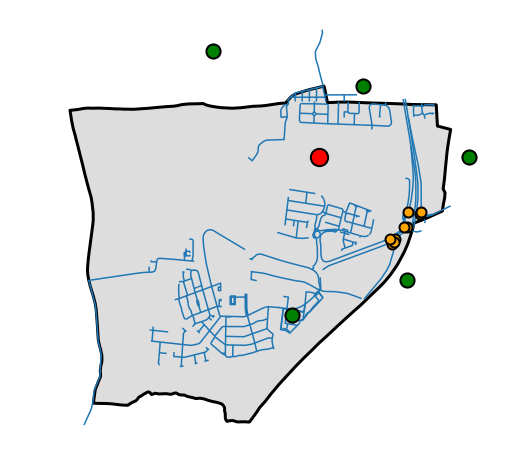

In [202]:
import matplotlib.pyplot as plt
import shapely
fig, ax = plt.subplots(figsize=(8,8))

c = 20
city.iloc[c:c+1].plot(ax=ax, color='#dddddd', linewidth=3, edgecolor='black')
gpd.sjoin(geography.lines.drop([8695,4252,8452]), city.iloc[c:c+1]).plot(ax=ax)
gpd.sjoin(geography.points, city.iloc[c:c+1]).plot(ax=ax, color='orange', markersize=100,zorder=10,edgecolors='black',linewidth=2)

gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6294612, 55.0314515])]).plot(color='green',ax=ax, markersize=200,edgecolors='black',linewidth=2,zorder=10)
gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6344612, 55.0424515])]).plot(color='green',ax=ax, markersize=200,edgecolors='black',linewidth=2,zorder=10)
gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6514612, 55.0444515])]).plot(color='green',ax=ax, markersize=200,edgecolors='black',linewidth=2,zorder=10)
gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6424612, 55.0294515])]).plot(color='green',ax=ax, markersize=200,edgecolors='black',linewidth=2,zorder=10)
gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6224612, 55.0384515])]).plot(color='green',ax=ax, markersize=200,edgecolors='black',linewidth=2,zorder=10)


gpd.GeoDataFrame(geometry=[shapely.geometry.Point([-1.6394612, 55.0384515])]).plot(color='red',ax=ax, markersize=300,edgecolors='black',linewidth=2)
import seaborn as sns
sns.despine(left=True,bottom=True)
plt.axis('off')
plt.savefig('plots/map.png')